In [166]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [171]:
img_file=cv2.imread("Books/intro.jpg")
#cv2.imshow("Image",img_file)
#cv2.waitKey(0)

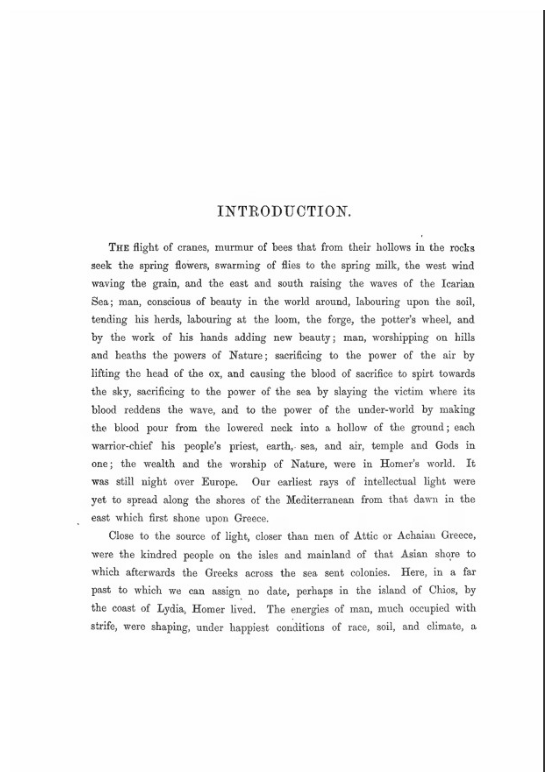

In [172]:
#displaying the image using matplotlib for easier viewing
def display(image):
    img_file=cv2.imread(image)
    height,width= img_file.shape[:2]
    
    dpi=80
    figsize=height/float(dpi),width/float(dpi)
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    ax.axis('off')
    
    ax.imshow(img_file,cmap='grey')
    plt.show()
    
display("Books/intro.jpg")

In [173]:
# converting the image to greyscale
def greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grey_image=greyscale(img_file)
cv2.imwrite("Books/intro_greyscale.jpg", grey_image)

True

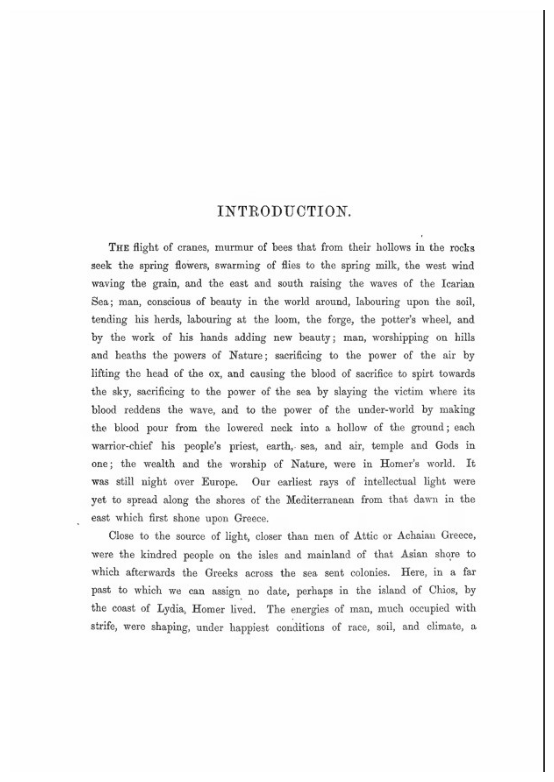

In [174]:
display("Books/intro_greyscale.jpg")

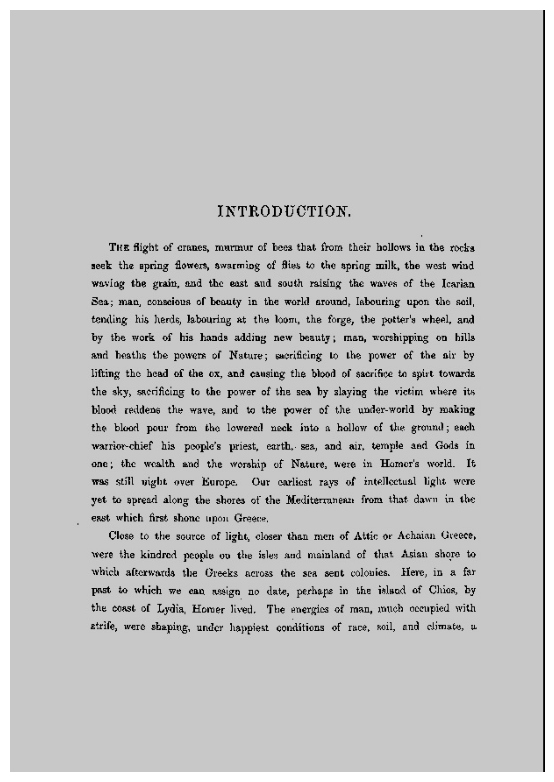

In [ ]:
#converting the image to black and white so the text pop-out
thresh, im_bw=cv2.threshold(grey_image, 170 , 200, cv2.THRESH_BINARY)
cv2.imwrite("Books/intro_bw.jpg", im_bw)
display("Books/intro_bw.jpg")

In [199]:
#removing noise from the image
def noise_removal(image):
    kernel=np.ones((1,1), np.uint8)
    
    image=cv2.erode(image, kernel, iterations=1)
    #image=cv2.dilate(image,kernel, iterations=1)
    #image=cv2.erode(image, kernel, iterations=1)
    image=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    #image=cv2.medianBlur(image,3)
    
    return image

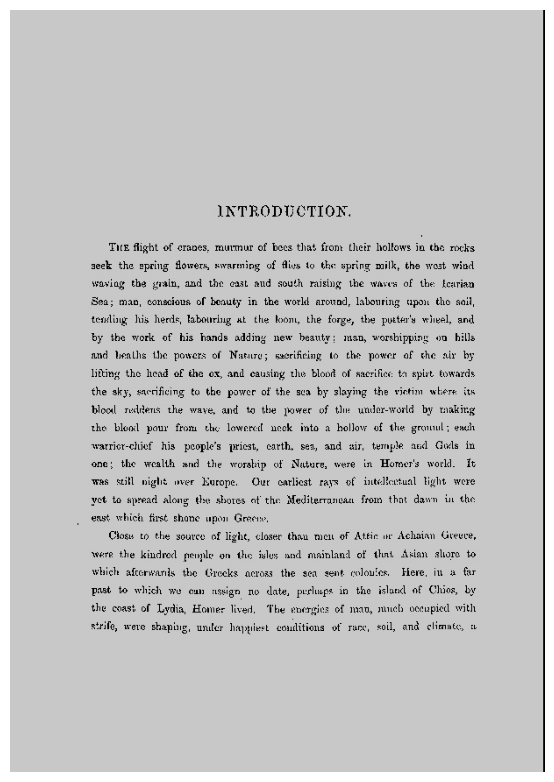

In [200]:
im_wonoise=noise_removal(im_bw)
cv2.imwrite("Books/intro_wonoise.jpg", im_wonoise)
display("Books/intro_wonoise.jpg")

In [201]:
#adjusting font sizes using erosion

def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel= np.ones((1,1), np.uint8)
    
    image=cv2.erode(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return image


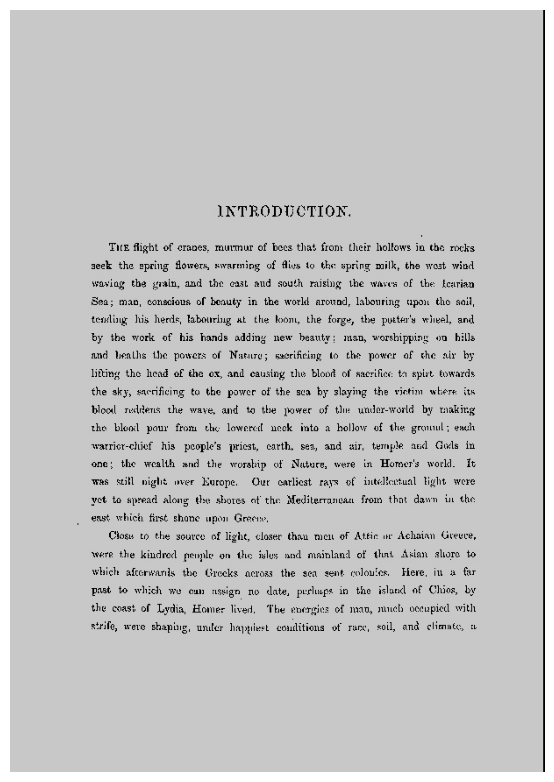

In [202]:
im_eroded=thin_font(im_wonoise)
cv2.imwrite("Books/intro_eroded.jpg", im_eroded)
display("Books/intro_eroded.jpg")

In [214]:
#time to thicken the font using dialation

def thick_font(image):
    kernel= np.ones((2,1), np.uint8)
    image=cv2.bitwise_not(image)
    image=cv2.dilate(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return image

In [215]:
im_thick=thick_font(im_eroded)
cv2.imwrite("Books/intro_thick.jpg", im_thick)


True

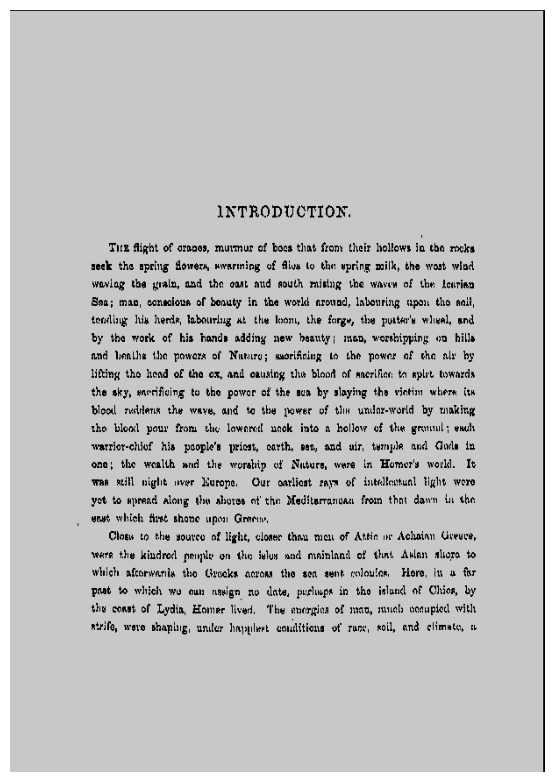

In [216]:
display("Books/intro_thick.jpg")

In [219]:
import pytesseract
from PIL import Image

img="Books/intro_thick.jpg"
ocr_img=Image.open(img)


In [220]:
ocr_result= pytesseract.image_to_string(ocr_img)
print(ocr_result)

INTRODUCTION,

TTitz flight of ormaos, murmur of boes that from thefr hollows in tho ro
seek ths spring fowera wvarming of lus (o the wpring milk, the wost whad
wovleg the gral, and the east and south rising the waren of the Jeu
Sea; man, conscious of bonuty in the workt around, Iabouring apen tho salt,
tending is herds, Wabourlug at the loom, the forge, the putter'y wll, and
by the work of his hand adding new beauty; man, worshipping oa bil
amd Uenlhe the powers of Nutro; waorifcing to the power af the aly by
lifting tho lend of the ox, and causing tho blood of ancrifec to apie towards
the sky, ancrificing to tho power of the aun by slaying the vietim where ite
loot! rutens the wave, and to the power of ti undoravorld by raking,

tho bloal pour from the lower ncok into a hollow of the growl; euuh
-warsior-chiof his poople's pricst, onrth, ven, and air, twmple and ofa in
fone; the wealth nnd the worship of Neture, were in Homer's world, It
‘wan still night over Kurope, Gur catlicst ray